# Final Project FP-6:  Machine Learning


<br>
<br>

___

<br>

# Analysis of Factors Affecting PM2.5 Concentration in Beijing, China (2010–2014)


* **Name**:  Tania Wening Nur Kinasih
* **Student number**:  0490373099

<br>

### Purpose:
- The purpose of this Final Project is to analyze the meteorological and temporal factors that influence the concentration of Particulate Matter (PM 2.5) in Beijing between 2010 and 2014. The detailed purpose of this Final Project are explained as follows:
  1. PM2.5 concentrations will be examined in relation to weather and temporal factors to identify patterns and correlations.
  2. Compute adjusted PM2.5 concentrations, where the effects of meteorological conditions are statistically removed to allow fairer comparisons across different time periods and events.

- The dependent vaiable (DV) is the PM2.5 concentration (in µg/m³) measured hourly

- The independent variables (IVs) are:

  1. Dew Point (DEWP, in °C)
  2. Temperature (TEMP, in °C)
  3. Pressure (PRES, in hPa)
  4. Cumulated Wind Speed (lws, in m/s)
  5. Cumulated Hours of Rain (lr)
  6. Temporal factors (month)
     
The dataset contains over 43,824 hourly records of meteorological and air quality measurements from January 2010 to December 2014.
<br>

### Dataset source:

The data comes from the [Beijing PM2.5](https://archive.ics.uci.edu/dataset/381/beijing+pm2+5+data) dataset from [UCI Machine Learning](https://archive.ics.uci.edu/).

The data are available for download [here](https://archive.ics.uci.edu/static/public/381/beijing+pm2+5+data.zip).

Analyses of this dataset have been published previously in Liang et al. (2015).

#### References:

Liang, X., Zou, T., Guo, B., Li, S., Zhang, H., Zhang, S., Huang, H., & Chen, S. X. (2015). Assessing Beijing’s PM 2.5 pollution: severity, weather impact, APEC and winter heating. Proceedings of the Royal Society a Mathematical Physical and Engineering Sciences, 471(2182), 20150257. https://doi.org/10.1098/rspa.2015.0257

___

## Machine Learning Analysis



In [1]:
import importlib
import parse_data as mm
import machine as mn


importlib.reload(mm)
importlib.reload(mn)

df = mn.load_and_prepare_data("Air_Quality_Data.csv")

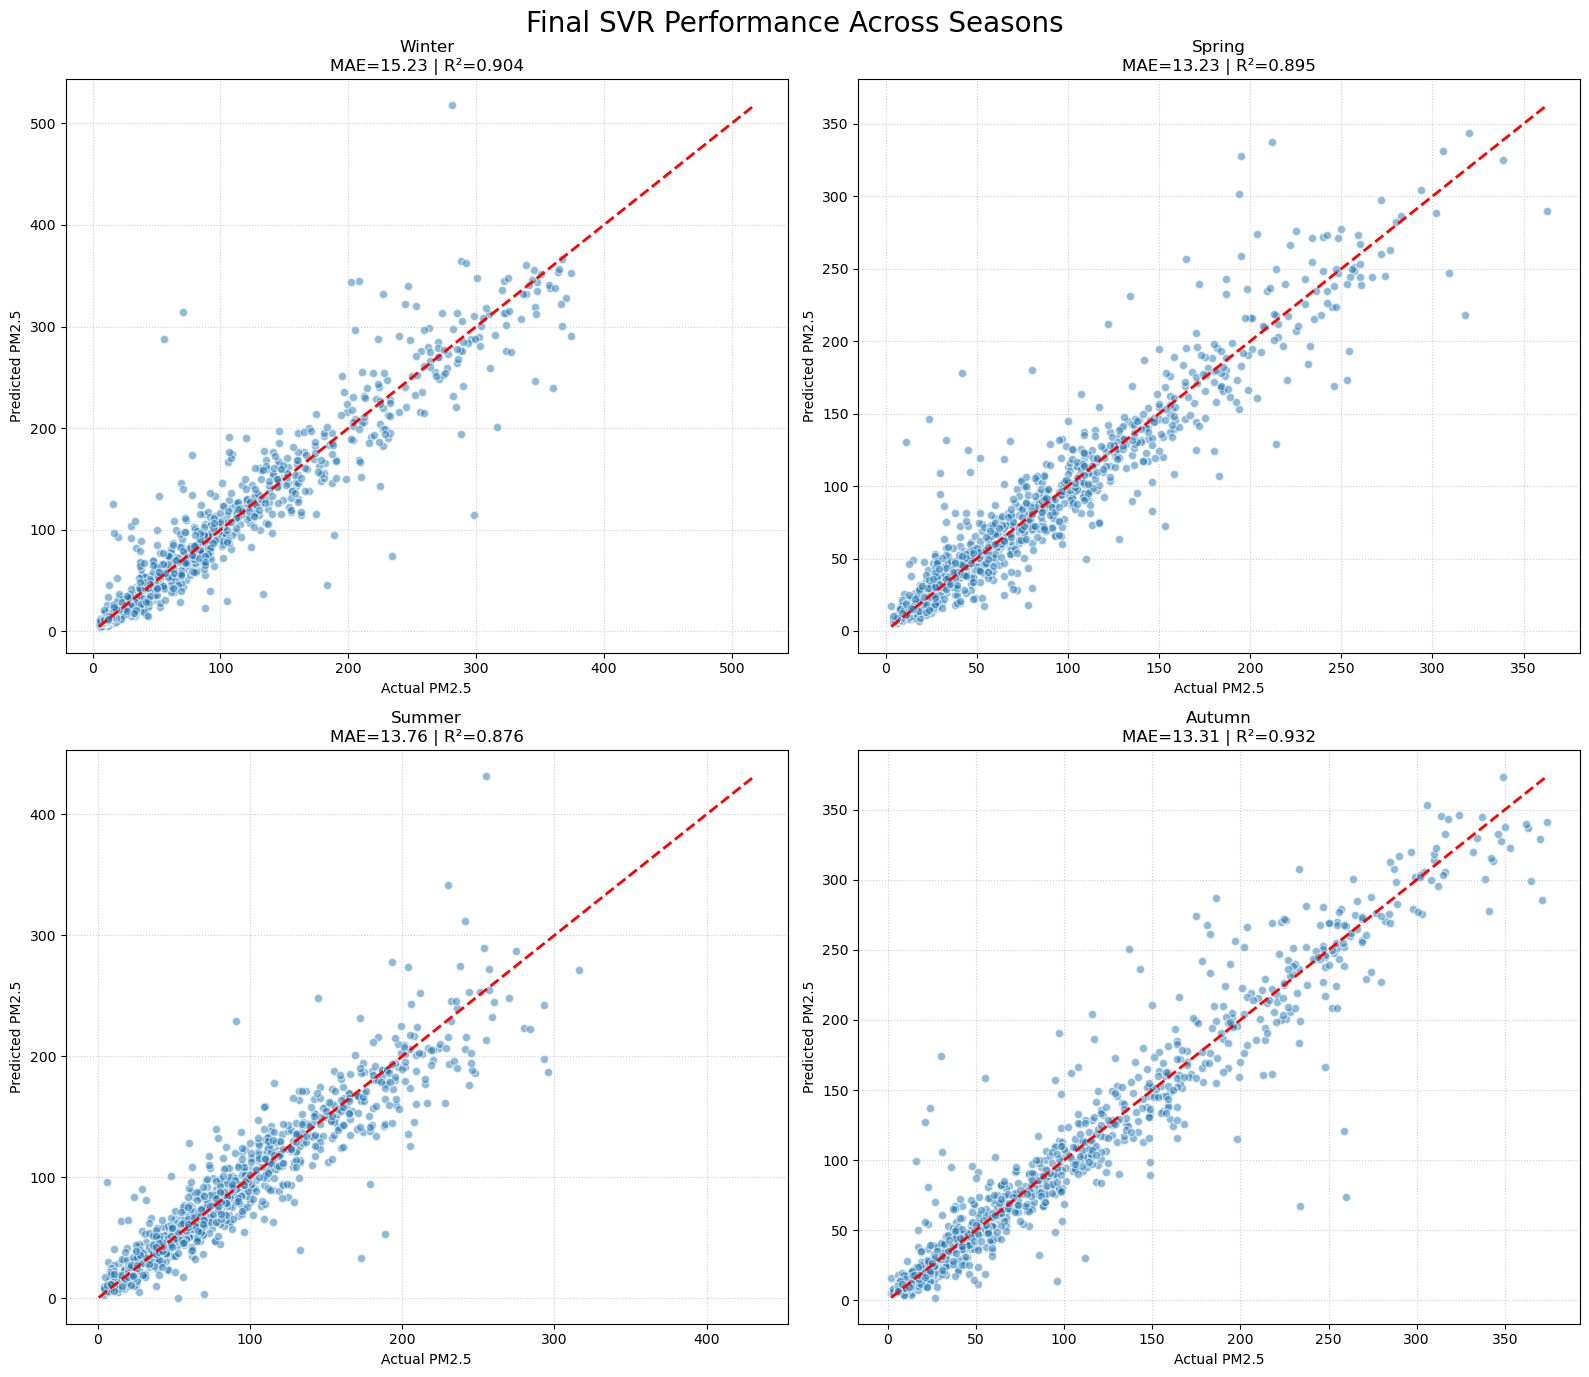

,Season,MAE,R2
0,Winter,15.23,0.904
1,Spring,13.23,0.895
2,Summer,13.76,0.876
3,Autumn,13.31,0.932


In [2]:
summary_df = mn.analyze_final_svr_performance(df, mn.SEASONS, mn.SET_E)
display(summary_df)

# Result of Final SVR Performance

The final model uses a high-penalty setting `(C=1000)` with a flexible `RBF kernel` and `"scale" gamma` to automatically adjust for data variations, combined with an error tolerance of `epsilon=0.1` and `"Log + Lag"` features to stabilize high pollution spikes and incorporate hourly memory. The result shows:
1. Better Accuracy: The SVR model is now approximately 90% accurate in predicting air quality, meaning it can identifies pollution levels almost every time.
2. Smart Memory: By teaching the model to "remember" the previous hour's data, we reduced the average margin of error to just 13 units, keeping predictions very close to reality.

This result can be verified by residual plots (see below). The residual plot shows that the errors are stable and unbiased, which is the technical basis that allows the model to achieve high R2 values in predicting air quality.

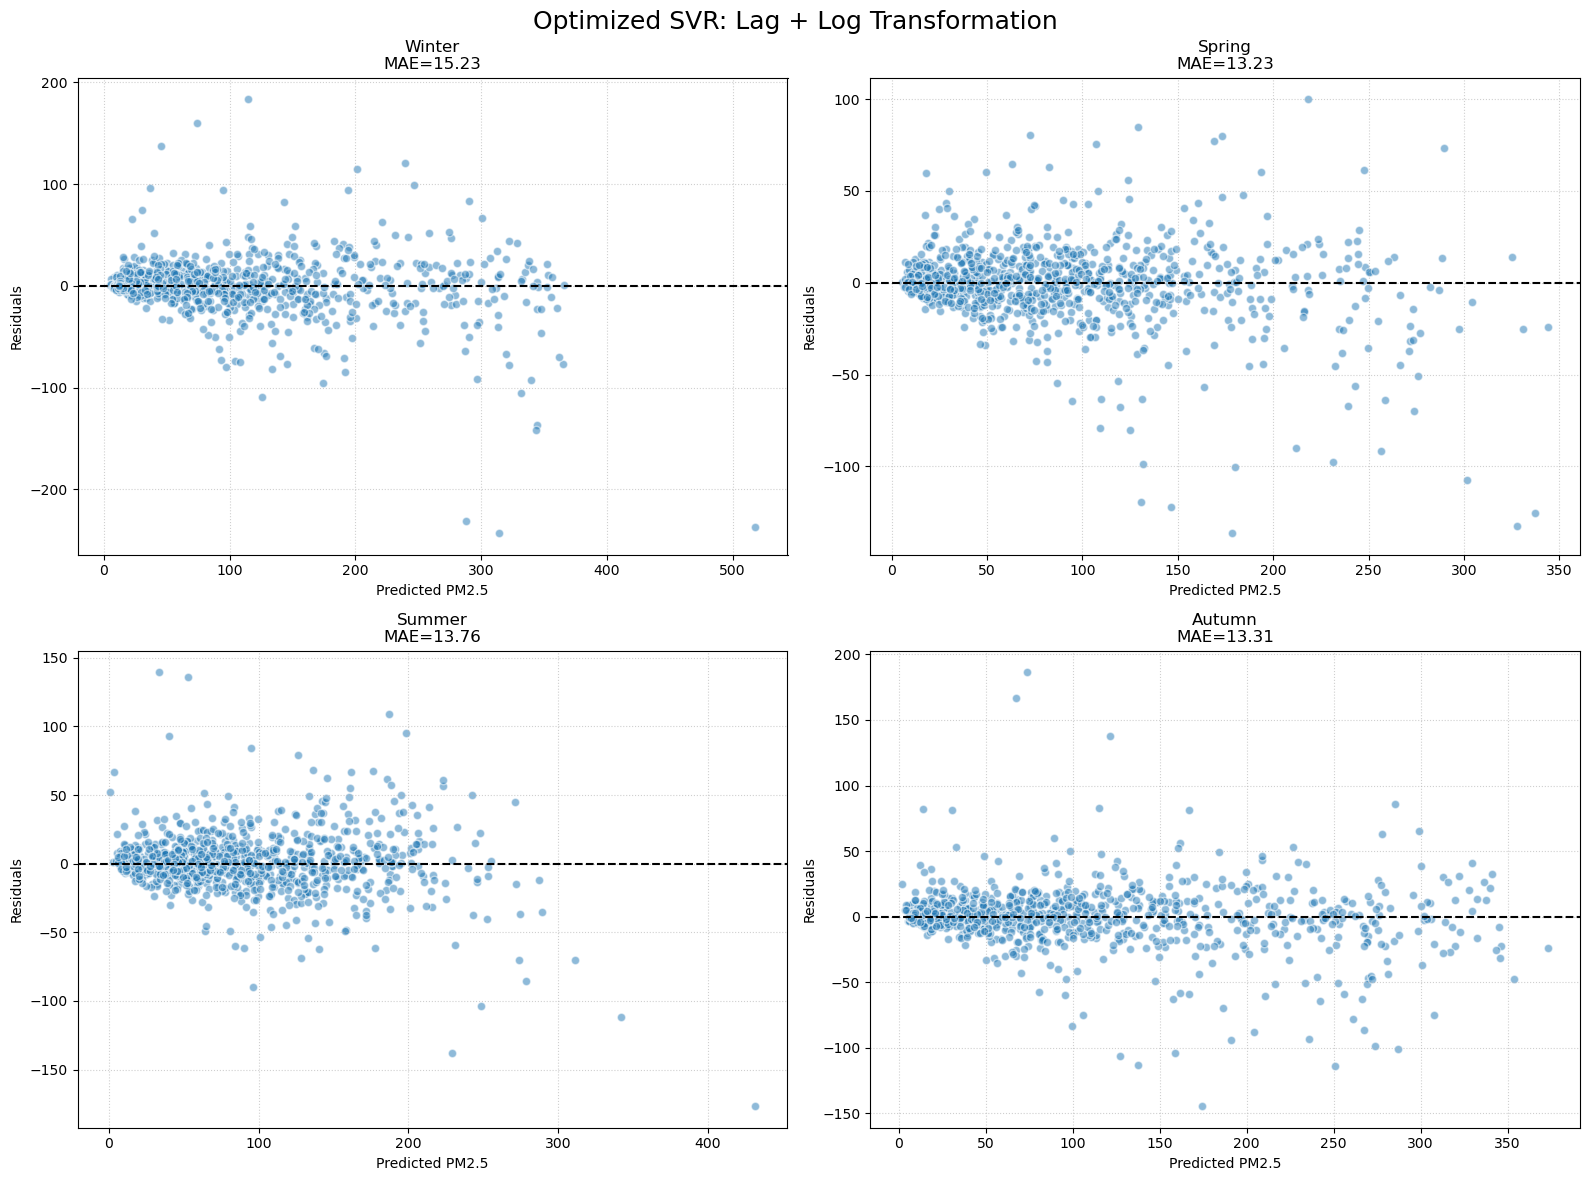

,Season,MAE
0,Winter,15.23
1,Spring,13.23
2,Summer,13.76
3,Autumn,13.31


In [3]:
summary_df = mn.analyze_optimized_svr(df, mn.SEASONS, mn.SET_E)
display(summary_df)